<img src="./abb/Logo_LehrePlus_150x150.png" alt="Drawing" style="width: 120px; float: left;"/>
<img src="./abb/TUK_LOGO_4C.jpg" alt="Drawing" style="width: 400px; float: right;"/>

# HM2 Hörsaalübung: Thermische Zustandsgleichungen
# 1.)  <u>Einführung </u>
* Die **Thermodynamik** ist ein wichtiges **Grundlagenfach** der Natur- und Ingenieurwissenschaften. Neben Naturgesetzen (Hauptsätze der Thermodynamik) befasst sie sich auch mit **Stoffeigenschaften** $\rightarrow$ hier vertieft. 


* Zur Beschreibung von Stoffeigenschaften sind Funtkionen vom Typ $f: \mathbb{R}^n \rightarrow \mathbb{R}$ wichtig.


* Hier nur betrachtet: Reinstoffe. Für diese gilt $n=2$.


* Wichtiges Beispiel für eine Funktion $f$:  **Thermische Zustandsgleichung** 
<p> $$f(p,v,T)=0$$  mit $p$: Druck, $[p]=\mathrm{Pa}$
<br>  mit $v$: molares Volumen (Kehrwert der Dichte), $[v]=\frac{\mathrm{m^3}}{\mathrm{mol}}$
<br> mit $T$: Temperatur, $[T]=\mathrm{K}$
<br> <p> Hier diskutiert: Thermische Zustandsgleichung für **Fluide** (Oberbegriff für Flüssigkeiten und Gase). 


- Ein $(p,v,T)$-Wertetripel wird **Zustandspunkt** genannt. 



# 2.) <u>Ideales Gas </u>

Für **alle** Stoffe bei hinreichend niedriger Dichte (d.h. hohem molekularem Volumen $v$) gilt die **thermische Zustandsgleichung des idealen Gases**
<p> $$ pv=RT \label{eq1}\tag{1}$$

\begin{align}
&\mathrm{mit} \qquad  R=8,314~\mathrm{\frac{J}{mol\cdot K}} \\
&\text{ideale Gaskonstante (Naturkonstante)}
\end{align}

<br> Umstellen von (1) z.B. nach p: 
<br> $$p=\frac{RT}{v}$$
$\rightarrow$ Funktion $\mathbb{R}^2 \rightarrow \mathbb{R}$: Bei Vorgabe von $T,v$ kann $p$ berechnet werden.
<br> <p> Darstellung von (1) als Fläche im $\mathbb{R}^3$

Dort auch gezeigt: Projektionen in den $\mathbb{R}^2$ 
<p>$\rightarrow$ Linien mit:
* $p=\mathrm{konst.} \rightarrow$ Isobaren
* $T=\mathrm{konst.} \rightarrow$ Isothermen
* $v=\mathrm{konst.} \rightarrow$ Isochoren

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import copy

%matplotlib inline  


In [3]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
R=8.314
def idealesGas(v, T):
    p=R*T/v
    return p

N=100
v_var = np.linspace(0.01, 0.04, N)
T_var = np.linspace(250, 350, N)


In [5]:
%matplotlib qt

v_mesh, T_mesh = np.meshgrid(v_var, T_var)
pvt_area = idealesGas(v_mesh, T_mesh)

fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')
ax.plot_surface(v_mesh,T_mesh,pvt_area/(10**5))
ax.set_xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$',labelpad=17,fontsize=20)
ax.set_ylabel('$T$ / K',labelpad=15,fontsize=20)
ax.set_zlabel('$p$  /bar',labelpad=5,fontsize=20);
ax.set_zlim((0, 3))
plt.title('$p, v, T$-Diagramm',fontsize=25, y=1.05)
plt.show()


## Projektionen in den $\mathbb{R}^2$ 
### Isobaren ($p=\text{konst.}$)

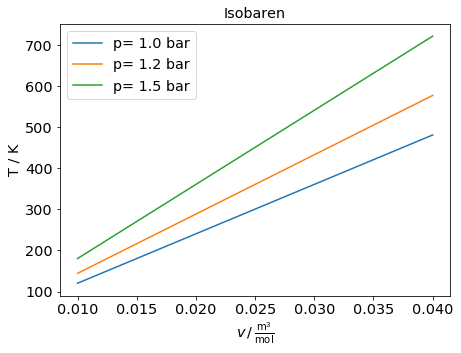

In [6]:
%matplotlib inline

# Isobaren
p_idx=np.array([1, 1.2, 1.5])*(10**5)
T_isobar = np.empty((0, len(v_var)))

for p in p_idx:
    T_isobar=np.append(T_isobar,[p*v_var/R],axis=0)
    
fig = plt.figure(figsize=(7, 5))
plt.plot(np.tile(v_var, (len(p_idx), 1)).T,T_isobar.T,'-')   
plt.xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$')
plt.ylabel('T / K')
plt.title('Isobaren')
plt.legend(['p= '+str(p_idx[0]/10**5)+' bar','p= '+str(p_idx[1]/10**5)+' bar','p= '+str(p_idx[2]/10**5)+' bar'])
plt.show()


### Isothermen ($T=\text{konst.}$)

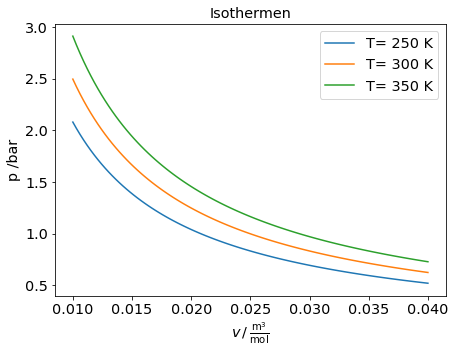

In [7]:
# Isotehrmen
T_idx=[250, 300, 350]
p_isotherm = np.empty((0, len(v_var)))

for T in T_idx:
    p=idealesGas(v_var,T)
    p_isotherm=np.append(p_isotherm,[p],axis=0)
    
fig = plt.figure(figsize=(7, 5))
plt.plot(np.tile(v_var, (len(T_idx), 1)).T,p_isotherm.T/10**5,'-')
plt.xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$')
plt.ylabel('p /bar')
plt.title('Isothermen')
plt.legend(['T= '+str(T_idx[0])+' K','T= '+str(T_idx[1])+' K','T= '+str(T_idx[2])+' K'],)
plt.show()
    

### Isochoren ($v=\text{konst.}$)

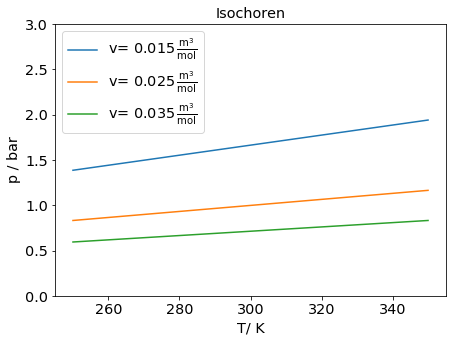

In [8]:
# Isochoren
v_idx=[0.015, 0.025, 0.035]
p_isochor = np.empty((0, len(T_var)))

for v in v_idx:
    p=idealesGas(v,T_var)
    p_isochor=np.append(p_isochor,[p],axis=0)
    
fig = plt.figure(figsize=(7, 5))
plt.plot(np.tile(T_var, (len(v_idx), 1)).T,p_isochor.T/10**5,'-')
plt.xlabel('T/ K')
plt.ylabel('p / bar')
plt.title('Isochoren')
plt.legend(['v= '+str(v_idx[0])+r'$\, \frac{\mathrm{m^3} }{\mathrm{mol}}$','v= '+str(v_idx[1])+r'$ \, \frac{\mathrm{m^3} }{\mathrm{mol}}$','v= '+str(v_idx[2])+r'$ \, \frac{\mathrm{m^3} }{\mathrm{mol}}$'],loc=2)
plt.ylim((0, 3))
plt.show()

## Richtungsableitungen / Totales Differential

Eine differnetielle Änderung des Drucks kann wie folgt dargestellt werden:

$$\mathrm{d} p = (\frac{\partial p}{\partial T})_v  \mathrm{d} T+ (\frac{\partial p}{\partial v})_T  \mathrm{d} v$$ 
<br>Für das ideale Gas git: $$p=\frac{RT}{v}$$:
<br>
$$\Longrightarrow (\frac{\partial p}{\partial T})_v =\frac{R}{v}$$  
$$\Longrightarrow (\frac{\partial p}{\partial v})_T =-\frac{RT}{v^2}$$   
$$\Longrightarrow \mathrm{d}p = \frac{R}{v}  \mathrm{d} T+ (-\frac{RT}{v^2}) \mathrm{d} v$$
Veranschaulischung im $p,v,T$-Diagramm

In [9]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)



In [10]:
%matplotlib qt
p_center=idealesGas(v_var[50], T_var[50])/10**5
p_dv=idealesGas(v_var[50], T_var[80])/10**5
p_dT=idealesGas(v_var[30], T_var[50])/10**5

fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')
# p,v,T-Fläche
ax.plot_surface(v_mesh,T_mesh,pvt_area/(10**5))

# dp/dT
xs1 = [v_var[50],v_var[50]]
ys1 = [T_var[50],T_var[70]]
zs1 = [p_center,p_dv]
ax.text(v_var[65],T_var[48],p_dv, r'$ (\frac{\partial p}{\partial T})_v$','y', color='darkorange',size=25,va='baseline',ha='right')
arw = Arrow3D([xs1[0],xs1[1]],[ys1[0],ys1[1]],[zs1[0],zs1[1]], arrowstyle="->", color="darkorange", lw = 3, mutation_scale=25)
ax.add_artist(arw)

# dp/dv
xs1 = [v_var[50],v_var[30]]
ys1 = [T_var[50],T_var[50]]
zs1 = [p_center,p_dT]
ax.text(v_var[45],T_var[45],p_dv, r'$ (\frac{\partial p}{\partial v})_T$','y', color='darkorange',size=25,va='baseline',ha='right')
arw = Arrow3D([xs1[0],xs1[1]],[ys1[0],ys1[1]],[zs1[0],zs1[1]], arrowstyle="->", color="darkorange", lw = 3, mutation_scale=25)
ax.add_artist(arw)

ax.set_xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$',labelpad=17,fontsize=20)
ax.set_ylabel('$T$ / K',labelpad=15,fontsize=20)
ax.set_zlabel('$p$  /bar',labelpad=5,fontsize=20);
ax.set_zlim((0, 3))
plt.title('$p, v, T$-Diagramm',fontsize=25, y=1.05)
plt.show()

# 3.)  <u>Zustandsänderungen und Kreisprozesse </u>
<ul> 
<li> Zunstandsänderung: Änderung des Zustands <span style="font-family: Arial; font-size:1.5em;color:black;"> ① </span> $(p_1,v_1,T_1)$ in einen anderen Zustand <span style="font-family: Arial; font-size:1.5em;color:black;"> ② </span>$(p_2,v_2,T_2)$, z.B. durch Zu- / Abfuhr von Arbeit / Wärme </li>    
<li> <p> Kreisprozess: </li> 
    <ul>
        <li>  Mehrere Zunstandsänderungen hintereinander </li> 
        <li> Zweck: Umwandlung Wärme $\leftrightarrow$ Arbeit </li>
        <li> Beispiele:</li> 
                <ul>
                <li>Verbrennungsmotor (Wärme $\rightarrow$ Arbeit) </li>
                <li>Kühlschrank (Arbeit $\rightarrow$ Wärme) </li>
                </ul> 
    </ul>
    
   
<li> <p> Hier diskutiert: **STIRLING-Kreisprozess** mit idealem Gas
<br> <span style="font-family: Arial; font-size:1.5em;color:black;"> ① </span> $\rightarrow$ <span style="font-family: Arial; font-size:1.5em;color:black;"> ② </span>      isochore Wärmezufuhr 
<br> <span style="font-family: Arial; font-size:1.5em;color:black;"> ② </span> $\rightarrow$ <span style="font-family: Arial; font-size:1.5em;color:black;"> ③ </span>      isotherme Expansion 
<br> <span style="font-family: Arial; font-size:1.5em;color:black;"> ③ </span> $\rightarrow$ <span style="font-family: Arial; font-size:1.5em;color:black;"> ④ </span>      isochore Wärmeabfuhr
<br> <span style="font-family: Arial; font-size:1.5em;color:black;"> ④ </span> $\rightarrow$ <span style="font-family: Arial; font-size:1.5em;color:black;"> ① </span>      isotherme Kompression </li>    
<li> <p> Dabei Netto Umwandlung von Wärme in Arbeit</li> 
<li> <p> Kreisprozess auf der $p,v,T$-Fläche des idealen Gases</li>
</ul>

In [11]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )


## Stirling-Kreisprozess im $p,v$-Diagramm

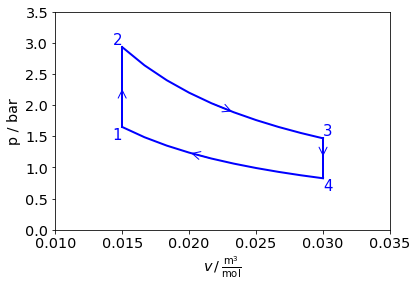

In [12]:
# STRILING Kreisprozess (p,v-Diagramm)
%matplotlib inline
# Vorgabe T und v für Zustände 1-4
T14=298
T23=530

v12=0.015
v34=0.03

# Berechnung von p1-p4 über ideales Gas Gesetz
p1=idealesGas(v12, T14)/10**5
p2=idealesGas(v12, T23)/10**5
p3=idealesGas(v34, T23)/10**5
p4=idealesGas(v34, T14)/10**5

range_v=np.linspace(v12,v34,10)
p41=idealesGas(range_v, T14)/10**5
p23=idealesGas(range_v, T23)/10**5

plt.figure()
#Zustandsänderung 1->2
ZAE_12 = plt.plot([v12,v12,v12],[p1,(p1+p2)/2,p2],'b-',lw=2)[0]
add_arrow(ZAE_12, direction='right', size=20)

#Zustandsänderung 2->3
ZAE_23 = plt.plot(range_v,p23,'b-',lw=2)[0]
add_arrow(ZAE_23, direction='right', size=20)

#Zustandsänderung 3->4
ZAE_34 = plt.plot([v34,v34,v34],[p3,(p3+p4)/2,p4],'b-',lw=2)[0]
add_arrow(ZAE_34, direction='right', size=20)

#Zustandsänderung 4->1
ZAE_41 = plt.plot(range_v,p41,'b-',lw=2)[0]
add_arrow(ZAE_41, direction='left', size=20)
plt.text(v12, p1, '1',color='blue', fontsize=15,va='top',ha='right')
plt.text(v12, p2, '2',color='blue', fontsize=15,va='bottom',ha='right')
plt.text(v34, p3, '3',color='blue', fontsize=15,va='bottom',ha='left')
plt.text(v34, p4, '4',color='blue', fontsize=15,va='top',ha='left')

plt.xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$')
plt.ylabel('p / bar')
plt.xlim(0.01,0.035)
plt.ylim(0,3.5)

plt.show()

## Stirling-Kreisprozess im $p,v,T$-Diagramm

In [15]:
%matplotlib qt
# Vorgabe T und v für Zustände 1-4
T14=293
T23=330
v12=0.015
v34=0.03

# Berechnung von p1-p4 über ideales Gas Gesetz
p1=idealesGas(v12, T14)/10**5
p2=idealesGas(v12, T23)/10**5
p3=idealesGas(v34, T23)/10**5
p4=idealesGas(v34, T14)/10**5

range_v=np.linspace(v12,v34,10)
p41=idealesGas(range_v, T14)/10**5
p23=idealesGas(range_v, T23)/10**5


fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')
# p,v,T-Fläche
ax.plot_surface(v_mesh,T_mesh,pvt_area/10**5)
#1->2 
ax.plot3D([v12,v12],[T14,T23],[p1,p2],color='darkorange') # Isothermen
#2->3
ax.plot3D(range_v,[T23]*len(p23),p23,color='darkorange') # Isothermen
#3->4
ax.plot3D([v34,v34],[T23,T14],[p3,p4],color='darkorange') # Isothermen
#4->1
ax.plot3D(range_v,[T14]*len(p41),p41,color='darkorange') # Isothermen

#Zustandspunkte
ax.text(v12,T14,p1, '1','y', color='darkorange',size=15,va='baseline',ha='right')
ax.text(v12,T23,p2, '2','y', color='darkorange',size=15,va='bottom',ha='center')
ax.text(v34,T23,p3, '3','y', color='darkorange',size=15,va='baseline',ha='left')
ax.text(v34,T14,p4, '4','y', color='darkorange',size=15,va='top',ha='center')

ax.set_xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$',labelpad=17,fontsize=20)
ax.set_ylabel('$T$ / K',labelpad=15,fontsize=20)
ax.set_zlabel('$p$ / bar',labelpad=5,fontsize=20);
plt.title('$p, v, T$ Diagramm',fontsize=25, y=1.05)
plt.show()

# 4.)  <u>Van-der-Waals Gleichung  </u>
* Erweiterung von (1) zur Beschreibung von Flüssigkeiten und Gasen
* Beinhaltet Übergänge Flüssig $\rightarrow$ Gas (Sieden) und Gas$\rightarrow$Flüssig (Kondensieren)
* ** Van-der-Waals-Gleichung:** $$p=\frac{RT}{v-b}-\frac{a}{v^2} \label{eq2} \tag{2}$$

* Die Parameter a / b  beschreiben anziehende / abstoßende Wechselwirkungen zwischen den Fluidmolekülen.
* Darstelllung von (2) im $p,v,T$-Diagramm + Projektionen 
* Dort: 
<ul>
        <li>  Nassdampfgebiet ($p,v$-Projektionen) </li> 
        <li>  Dampfdruckkurve ($p,T$-Projektionen)</li>
</ul>

* Nassdampfgebiet und Dampfdruckkurve können aus (2) berechnet werden. Herleitung hier aus Zeitgründen nicht aufgeführt.

In [34]:
# Reduzierte Einheiten
Tc=1;
pc=1;
R=8.314;
# Van-der-Waals Parameter
a=27/64*(R**2*Tc**2)/pc;
b=1/8*R*Tc/pc;
vc=3/8*R*Tc/pc;

In [35]:
# Van-der-Waals Gleichung
def vdWEOS(v,T):
    p=R*T/(v-b)-a/(v**2)
    return p

In [36]:
# Maxwell Kriterium
def MaxwellCriterion(p):
    v_solve=np.roots([1, -R*T/p-b, a/p, -a*b/p])
    v1=np.min(v_solve.real)
    v2=np.max(v_solve.real)
    out= a/v2-a/v1+R*T*np.log((v2-b)/(v1-b))-p*(v2-v1)
    return out

In [37]:
%matplotlib qt 
T_lwTcrit=(np.linspace(1,0.62,1000))
v_Liq_all = np.empty((0,0))
v_Gas_all = np.empty((0,0))
p_coex_all = np.empty((0,0))
vdW_area_NDG=np.empty(1000)

#Startwert für p
p_guess=0.5

for i,T in enumerate(T_lwTcrit):
    p_coex=fsolve(MaxwellCriterion,p_guess)
    vRoots=np.roots([1, -R*T/p_coex-b, a/p_coex, -a*b/p_coex])
    v_Liq=np.min(vRoots)
    v_Gas=np.max(vRoots)
    v=np.logspace(0.03*vc,np.log10(15*vc),1000)
    
    # Van-der-Waals-Fläche
    p=vdWEOS(v,T);
    
    # Nassdampfgebiet
    index_NDG=np.where((v>v_Liq) & (v<v_Gas))
    p_NDG=copy.deepcopy(p)
    p_NDG[index_NDG]=np.nan
    # Van-der-Waals-Fläche mit Nassdampfgebiet
    vdW_area_NDG=np.vstack((vdW_area_NDG,p_NDG))
    
    # Erweitere Daten
    v_Liq_all=np.append(v_Liq_all,v_Liq)
    v_Gas_all=np.append(v_Gas_all,v_Gas)
    p_coex_all=np.append(p_coex_all,p_coex)

    # Update Startwert
    p_guess=p_coex


# Lösche 1. Zeile in pvt_area
vdW_area_NDG=np.delete(vdW_area_NDG, (0), axis=0)

In [38]:
%matplotlib qt

# Anpassen der Daten für surface plot
for i in np.arange(len(v)):
    for j in np.arange(len(T_lwTcrit)):
        if vdW_area_NDG[j,i]> 4.2:
            vdW_area_NDG[j,i] = np.nan
        else:
            pass
# Gitter füt plot        
v_mesh, TlwTcrit_mesh = np.meshgrid(v, T_lwTcrit)        

# Berechne van-der Waals-Fläche füt T>Tcrit
T_upTcrit=(np.linspace(1,1.4,1000))
v_upTcrit_mesh, T_upTcrit_mesh = np.meshgrid(v, T_upTcrit)
vdW_area_upTcrit = vdWEOS(v_upTcrit_mesh, T_upTcrit_mesh)
# Anpassen der Daten für surface plot
for i in np.arange(len(v)):
    for j in np.arange(len(v)):
        if vdW_area_upTcrit[j,i]> 4.2:
            vdW_area_upTcrit[j,i] = np.nan
        else:
            pass


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Van-der-Waals -Fläche mit Nassdampfgebiet
ax.plot_surface(v_mesh/vc,TlwTcrit_mesh,vdW_area_NDG, cmap=cm.coolwarm,linewidth=1)

# Van-der-Waals -Fläche für T>Tcrit
ax.plot_surface(v_upTcrit_mesh/vc,T_upTcrit_mesh,vdW_area_upTcrit, cmap=cm.coolwarm,linewidth=1)
#Siedelinie
ax.plot3D(np.append(vc,v_Liq_all)/vc,np.append(Tc,T_lwTcrit),np.append(pc,p_coex_all),'k-')
#Taulinie
ax.plot3D(np.append(vc,v_Gas_all)/vc,np.append(Tc,T_lwTcrit),np.append(pc,p_coex_all),'k-')

ax.set_xlabel(r'$ v\,/\, \frac{\mathrm{m^3} }{\mathrm{mol}}$',labelpad=17,fontsize=20)      
ax.set_ylabel('$T$ / K',labelpad=15,fontsize=20)
ax.set_zlabel('$p$ / bar',labelpad=5,fontsize=20);
plt.title('$p, v, T$ Diagramm',fontsize=25, y=1.05)
plt.show()

C:\Users\steimers\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\steimers\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
